In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential

In [4]:
# Charger les données
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# Classes
Class_cifar10 = ['Avion', 'Automobile','Oiseau','Chat','Cerf','Chien','Grenouille','Cheval','Bateau','Camion']

In [6]:
# Formes des ensembles d'entrainement et de test
print(f"Ensemble d'entrainement (Image) : {X_train.shape}")
print(f"Ensemble d'entrainement (Étiquette) : {y_train.shape}")
print(f"Ensemble de test (Image) : {X_test.shape}")
print(f"Ensemble de test (Étiquette) : {y_test.shape}")

Ensemble d'entrainement (Image) : (50000, 32, 32, 3)
Ensemble d'entrainement (Étiquette) : (50000, 1)
Ensemble de test (Image) : (10000, 32, 32, 3)
Ensemble de test (Étiquette) : (10000, 1)


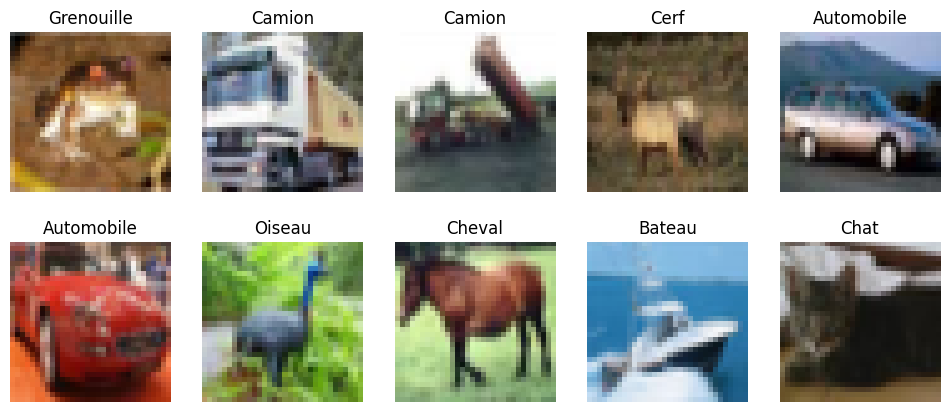

In [7]:
# Visualisation de quelques images

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(X_train[i])
    plt.title(Class_cifar10[y_train[i][0]])
    plt.axis('off')
plt.show()

In [8]:
# Distribution
Distribution_Class = [0]*10
for label in y_train:
    Distribution_Class[label[0]] += 1

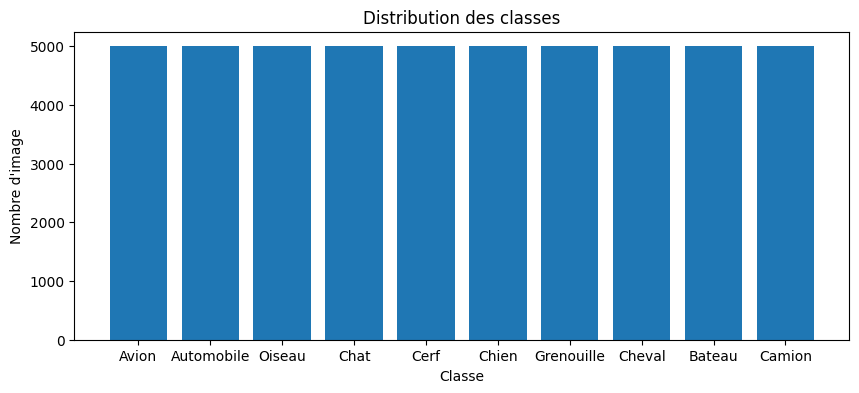

In [9]:
plt.figure(figsize=(10,4))
plt.bar(Class_cifar10, Distribution_Class)
plt.title('Distribution des classes')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'image')
plt.show()

In [10]:
# Prétraitement des données

    # Normalisation
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [11]:
    # One-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [12]:
    # Dimension après prétraitement
print(f"Ensemble d'entrainement (Image) : {X_train.shape}")
print(f"Ensemble d'entrainement (Étiquette) : {y_train.shape}")
print(f"Ensemble de test (Image) : {X_test.shape}")
print(f"Ensemble de test (Étiquette) : {y_test.shape}")

Ensemble d'entrainement (Image) : (50000, 32, 32, 3)
Ensemble d'entrainement (Étiquette) : (50000, 10)
Ensemble de test (Image) : (10000, 32, 32, 3)
Ensemble de test (Étiquette) : (10000, 10)


In [22]:
# Construction du modèle

    # Modèle MLP
mpl_model = Sequential([
    layers.Input(shape=(32,32,3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [23]:
mpl_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
mpl_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
historique = mpl_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
test_loss, test_accuracy = mpl_model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2668 - loss: 2.0502 - val_accuracy: 0.3497 - val_loss: 1.8276
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3692 - loss: 1.7685 - val_accuracy: 0.3924 - val_loss: 1.7070
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3983 - loss: 1.6888 - val_accuracy: 0.4017 - val_loss: 1.6947
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4174 - loss: 1.6466 - val_accuracy: 0.4150 - val_loss: 1.6752
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4271 - loss: 1.6132 - val_accuracy: 0.4253 - val_loss: 1.6343
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4386 - loss: 1.5826 - val_accuracy: 0.4376 - val_loss: 1.6053
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4403 - loss: 1.5684 - val_accuracy: 0.4346 - val_loss: 1.5943
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4459 - loss: 1.5586 - val_accuracy: 0.

In [26]:
print(test_accuracy)
print(test_loss)

0.45019999146461487
1.5718975067138672


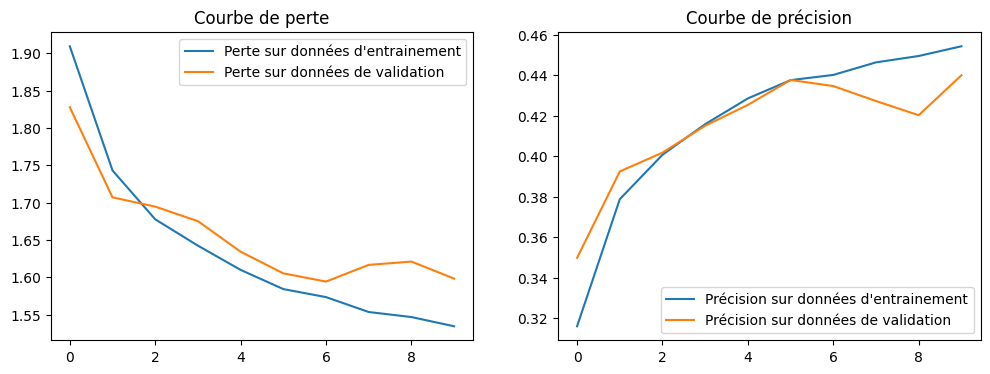

In [27]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(historique.history['loss'], label= "Perte sur données d'entrainement")
plt.plot(historique.history['val_loss'], label= "Perte sur données de validation")
plt.legend()
plt.title("Courbe de perte")

plt.subplot(1,2,2)
plt.plot(historique.history['accuracy'], label="Précision sur données d'entrainement")
plt.plot(historique.history['val_accuracy'], label= "Précision sur données de validation")
plt.legend()
plt.title("Courbe de précision")

plt.show()